### Edges: Parallel Execution

We will be building this graph and see how state updates happen during the parallel execution. 

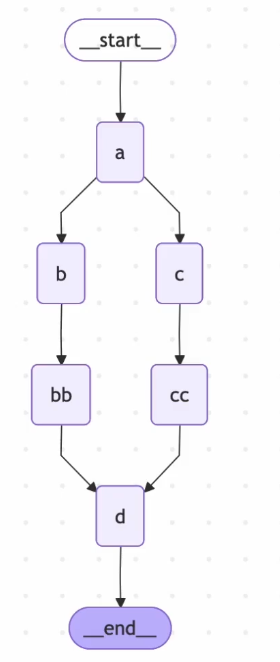

In [1]:
from IPython.display import Image, display
import operator
from typing import Annotated, List, Literal, TypedDict
from langgraph.graph import END, START, StateGraph
from langgraph.types import Command, interrupt

In [6]:
# Define the State

class State(TypedDict):
    nlist: Annotated[List[str], operator.add] # it adds a reducer function, which will append to the previous state value

In [7]:
# Defines the Nodes

def node_a(state: State) -> State:
    print(f"Adding 'A' to {state['nlist']}")
    return(State(nlist = ["A"]))

def node_b(state: State) -> State:
    print(f"Adding 'B' to {state['nlist']}")
    return(State(nlist = ["B"]))

def node_c(state: State) -> State:
    print(f"Adding 'C' to {state['nlist']}")
    return(State(nlist = ["C"]))

def node_bb(state: State) -> State:
    print(f"Adding 'BB' to {state['nlist']}")
    return(State(nlist = ["BB"]))

def node_cc(state: State) -> State:
    print(f"Adding 'CC' to {state['nlist']}")
    return(State(nlist = ["CC"]))

def node_d(state: State) -> State:
    print(f"Adding 'D' to {state['nlist']}")
    return(State(nlist = ["D"]))

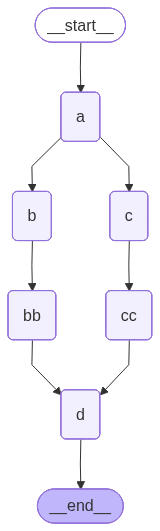

In [8]:
# Build the graph

builder = StateGraph(State)

# Add nodes -
builder.add_node("a", node_a)
builder.add_node("b", node_b)
builder.add_node("c", node_c)
builder.add_node("bb", node_bb)
builder.add_node("cc", node_cc)
builder.add_node("d", node_d)

# Add edges -
builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("a", "c")
builder.add_edge("b", "bb")
builder.add_edge("c", "cc")
builder.add_edge("bb", "d")
builder.add_edge("cc", "d")
builder.add_edge("d", END)

# Compile & Display -
graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [9]:
initial_state = State(
    nlist = ["Initial String"]
)

graph.invoke(initial_state)

Adding 'A' to ['Initial String']
Adding 'B' to ['Initial String', 'A']
Adding 'C' to ['Initial String', 'A']
Adding 'BB' to ['Initial String', 'A', 'B', 'C']
Adding 'CC' to ['Initial String', 'A', 'B', 'C']
Adding 'D' to ['Initial String', 'A', 'B', 'C', 'BB', 'CC']


{'nlist': ['Initial String', 'A', 'B', 'C', 'BB', 'CC', 'D']}